## Conclusions:
- Capoline and Ramocane were most effective
- Avg tumor size and mouse weight may be positively correlated
- Ceftamin effectiveness varied most from mouse to mouse out of the 4 most effective regimens

In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
#read in the mouse and study data
filepath_mouse = 'data/Mouse_metadata.csv'
filepath_study = 'data/Study_results.csv'

#read csv via pandas
mouse_df = pd.read_csv(filepath_mouse)
study_df = pd.read_csv(filepath_study)

#check out the dfs
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#merge dataframes
merged_df = mouse_df.merge(study_df, on='Mouse ID')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#getting unique IDs
merged_df['Mouse ID'].nunique()

249

In [6]:
#first ensuring that mice are sorted by ID and timepoint
#use duplicated function to determine duplicates of the two columns desired
duplicate_bools = merged_df.duplicated(['Mouse ID', 'Timepoint'],False)
#boolean indexing to grab true values, and then grab index values of those true values
duplicate_indexes = duplicate_bools[duplicate_bools].index
#now grab those duplicate rows
duplicate_df = merged_df.loc[duplicate_indexes]
#display
duplicate_df        

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
#dropping g989
mask_g989 = (merged_df['Mouse ID']!='g989')
unique_df = merged_df.loc[mask_g989,:]
unique_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
#new unique values
unique_df['Mouse ID'].nunique()

248

In [9]:
#grouping by drug regimen 
#using agg to gather summary stats
drug_sum_df = unique_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})
drug_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
#find the counts of each timepoint for each regimen by groupby and aggregate functions
bar_df = unique_df.groupby(['Drug Regimen']).agg({'Timepoint':'count'})
#rename the timepoint count column to correctly reflect values
bar_df = bar_df.rename(columns={'Timepoint':'Total Timepoints'})
#now reset index 
bar_reset = bar_df.reset_index()
bar_reset

,Drug Regimen,Total Timepoints
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


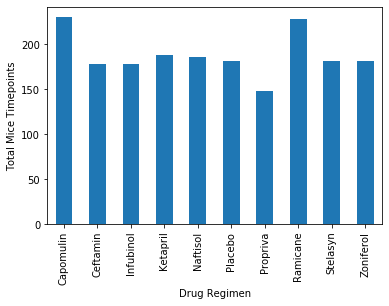

In [11]:
#using pandas to plot bar graph
bar_reset.plot(x='Drug Regimen', y='Total Timepoints',kind='bar',legend=False)
plt.ylabel('Total Mice Timepoints')
plt.show()

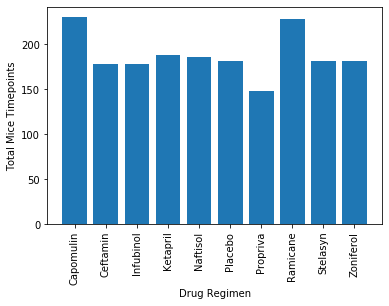

In [12]:
#now w matplotlib
plt.bar(x=bar_reset['Drug Regimen'], height=bar_reset['Total Timepoints'])
#labels
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice Timepoints')
#label orientation
plt.xticks(rotation=90)
plt.show()

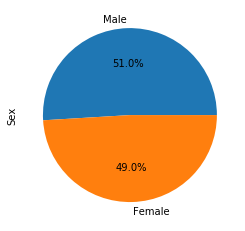

In [13]:
#pie graph with pandas
#starting with original dataframe
#looking for now male and female mice counts
pie_df = unique_df.loc[:,'Sex'].value_counts()
#to plot...specify kind, use autopct to include percentages
pie_df.plot(kind='pie',autopct='%1.1f%%')
plt.show()

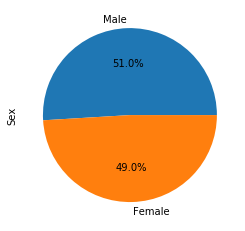

In [14]:
#pie graph with matplotlib, same format to get percentages, add labels
plt.pie(pie_df,autopct='%1.1f%%',labels=['Male','Female'])
plt.ylabel('Sex')
plt.show()

In [15]:
#Calculate Quartiles, Find Outliers, and Create a Box Plot
#grouping mice with max timepoint
time_last_df = unique_df.groupby('Mouse ID').agg({'Timepoint':'max'})
#reset index before merge
to_merge = time_last_df.reset_index()

In [16]:
#merging back to main
#using inner to only keep the common rows
merged_max_timepoints = unique_df.merge(to_merge, 'inner', on=['Mouse ID','Timepoint'])
merged_max_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [17]:
#list to store tumor vols
tumor_vol = []
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#now adding a list of each mouse in each treatment final tumor volume within a list
for treatment in treatments:
    mask_treatment = (treatment == merged_max_timepoints['Drug Regimen'])
    tumor_vol.append(merged_max_timepoints.loc[mask_treatment,:]['Tumor Volume (mm3)'].tolist())
tumor_vol

[[23.34359787,
  28.48403281,
  28.43096411,
  30.48598484,
  31.02392294,
  31.896238399999998,
  32.37735684,
  33.32909778,
  34.45529799,
  37.31184577,
  36.04104736,
  37.07402422,
  38.84687569,
  38.93963263,
  38.98287774,
  38.75326548,
  38.125164399999996,
  39.95234669,
  40.65812366,
  40.1592203,
  40.72857787,
  41.48300765,
  41.58152074,
  47.68596303,
  46.53920617],
 [22.05012627,
  29.12847181,
  30.27623175,
  30.56462509,
  30.63869575,
  31.56046955,
  31.09533505,
  33.39765251,
  32.97852192,
  33.56240217,
  36.13485243,
  38.81036633,
  37.22565033,
  36.37451039,
  36.56165229,
  37.31123552,
  38.34200823,
  38.407618299999996,
  40.65900627,
  40.66771292,
  45.22086888,
  43.04754260000001,
  43.41938077,
  43.16637266,
  44.18345092],
 [67.97341878,
  65.52574285,
  57.03186187,
  66.08306589,
  72.2267309,
  36.321345799999996,
  60.96971133,
  62.43540402,
  60.91876652,
  67.28962147,
  66.19691151,
  62.11727887,
  47.01036401,
  60.16518046,
  55.6

In [18]:
#looking for outliers for each regimen
outliers_list = []
for vol_list in tumor_vol:
    temp_outlier_sublist = []
    q3 = np.percentile(vol_list, 75)
    q1 = np.percentile(vol_list, 25)
    iqr = q3 - q1
    upper = 1.5*iqr + q3
    lower = q1 - 1.5*iqr
    for vol in vol_list:
        if vol >= upper or vol <= lower:
            temp_outlier_sublist.append(vol)        
    outliers_list.append(temp_outlier_sublist)
outliers_list

[[], [], [36.321345799999996], []]

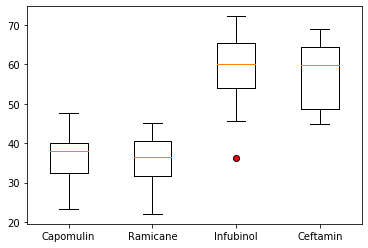

In [19]:
#boxplotting for each
plt.boxplot(tumor_vol, labels=treatments,flierprops={'markerfacecolor':'red'})
plt.show()

In [20]:
#back to original to pick a mouse treated with Capomulin
mask_capomulin = (unique_df['Drug Regimen']=='Capomulin')
capomulin_df = unique_df.loc[mask_capomulin,:]
mask_ID = (capomulin_df['Mouse ID'] == 's185')
capomulin_0 = capomulin_df.loc[mask_ID,:]
capomulin_0

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


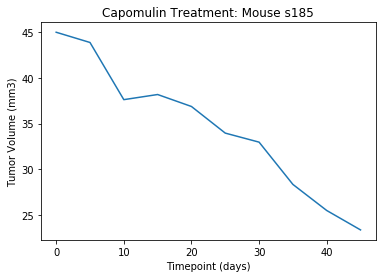

In [21]:
#now to plot line of Tumor Volume vs Timepoint for the first capomulin subject
plt.plot(capomulin_0['Timepoint'],capomulin_0['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment: Mouse s185')
plt.show()

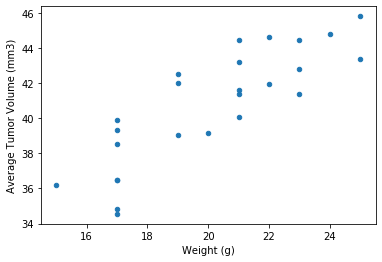

In [22]:
#to calculate for all capomulin, back to capomulin df
cp_agg = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)':'mean',
                                              'Weight (g)':'first'})
cp_agg_r = cp_agg.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'})
cp_agg_r.plot('Weight (g)','Average Tumor Volume (mm3)',kind='scatter')
plt.show()

Correlation Coefficient: 0.841936342469472


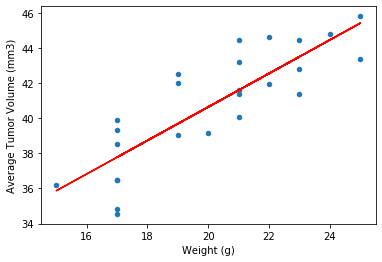

In [23]:
#using linregress to calc 5 outputs
m, b, r, p, stde= st.linregress(cp_agg_r['Weight (g)'],cp_agg_r['Average Tumor Volume (mm3)'])
#get line
y = m*cp_agg_r['Weight (g)']+b
print('Correlation Coefficient: ' + str(r))
cp_agg_r = cp_agg.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'})
cp_agg_r.plot('Weight (g)','Average Tumor Volume (mm3)',kind='scatter')
plt.plot(cp_agg_r['Weight (g)'], y, color='red')
plt.show()